In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
traindata = pd.read_csv('sales_data_sample.csv')

In [5]:
colslist = ['COUNTRY', 'PRODUCTLINE']
train_size = 0.33

In [6]:
data_sample = traindata.groupby(colslist, group_keys=False).apply(
            lambda x: x.sample(
                int(train_size*len(x)), random_state=1
            )
        )

In [7]:
traindata.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
data_sample.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
1395,10148,29,81.25,2,2356.25,9/11/2003 0:00,Shipped,3,9,2003,...,201 Miller Street,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small
47,10347,30,100.00,1,3944.70,11/29/2004 0:00,Shipped,4,11,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
2127,10169,24,94.58,6,2269.92,11/4/2003 0:00,Shipped,4,11,2003,...,201 Miller Street,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small
1414,10420,36,57.73,7,2078.28,5/29/2005 0:00,In Process,2,5,2005,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small
1399,10193,25,76.26,16,1906.50,11/21/2003 0:00,Shipped,4,11,2003,...,7 Allen Street,NaN,Glen Waverly,Victoria,3150,Australia,APAC,Connery,Sean,Small


In [9]:
traindata.shape

(2823, 25)

In [10]:
data_sample.shape

(865, 25)

In [11]:
def plot_pie(labels, sizes, title = ""):
    colors = ['#f47961', '#f0c419', '#255c61', '#78909c', '#6ad4cf', '#17aee8', '#5c6bc0', '#444b6e', '#ef4c60', '#744593', 
              '#ee5691', '#9ccc65', '#708b75', '#d1cb65', '#0d8de1', '#a4554b', '#694f5d', '#45adb3', '#26a69a', '#bdc7cc', ]
    colors = colors[0:len(labels)]
    
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice
    explode = explode[0:len(labels)]
    
    # Plot
    plt.figure(num=None, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()

In [12]:
pie_plot_data = traindata.groupby('COUNTRY', as_index=False)['COUNTRY'].value_counts()
pie_plot_data.sort_values(by=['count'], inplace = True)

In [13]:
pie_plot_data.head()

,COUNTRY,count
8,Ireland,16
12,Philippines,26
16,Switzerland,31
2,Belgium,33
10,Japan,52


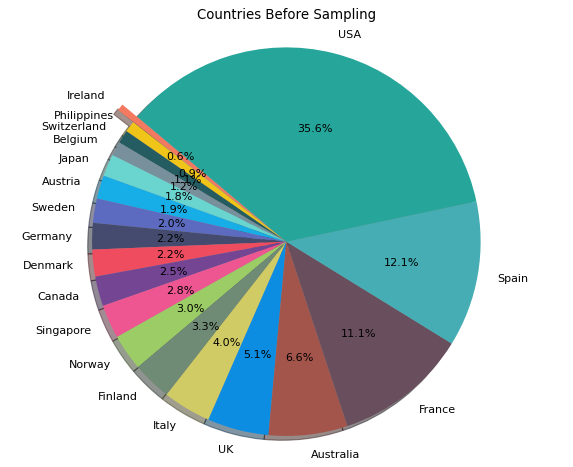

In [14]:
plot_pie(pie_plot_data.COUNTRY.values, pie_plot_data['count'].values, 'Countries Before Sampling')

In [15]:
pie_plot_data = data_sample.groupby('COUNTRY', as_index=False)['COUNTRY'].value_counts()
pie_plot_data.sort_values(by=['count'], inplace = True)

In [16]:
pie_plot_data.head()

,COUNTRY,count
8,Ireland,2
12,Philippines,7
2,Belgium,8
16,Switzerland,10
10,Japan,12


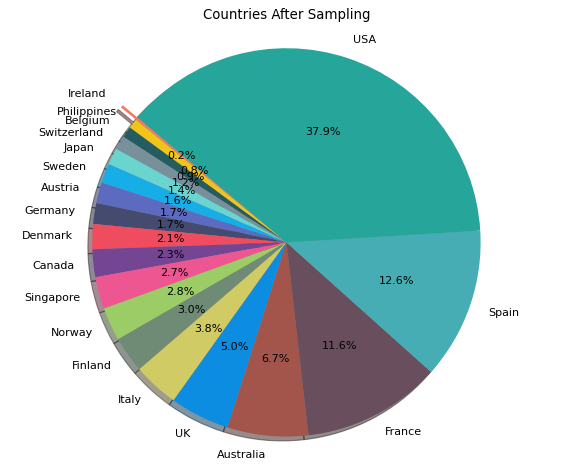

In [17]:
plot_pie(pie_plot_data.COUNTRY.values, pie_plot_data['count'].values, 'Countries After Sampling')

# Fixed Size Sampling With Equal Representation When Number of Records is Too Large

In [18]:
traindata.shape

(2823, 25)

In [19]:
traindata.groupby(colslist, group_keys=False)[colslist].value_counts()

COUNTRY    PRODUCTLINE     
Australia  Classic Cars         53
           Motorcycles          26
           Planes               25
           Ships                 2
           Trains                1
                              ... 
USA        Planes               95
           Ships                70
           Trains               25
           Trucks and Buses    112
           Vintage Cars        224
Length: 116, dtype: int64

In [20]:
print(traindata.groupby(colslist, group_keys=False)[colslist].value_counts().min())
print(traindata.groupby(colslist, group_keys=False)[colslist].value_counts().max())

1
329


In [21]:
data_sample = traindata.groupby(colslist, group_keys=False).apply(
            lambda x: x.sample(n = 1, random_state=1)
        ).reset_index(drop=True) 

In [22]:
pie_plot_data = data_sample.groupby('COUNTRY', as_index=False)['COUNTRY'].value_counts()
pie_plot_data.sort_values(by=['count'], inplace = True)

In [23]:
pie_plot_data.head()

,COUNTRY,count
16,Switzerland,1
12,Philippines,4
2,Belgium,5
1,Austria,6
3,Canada,6


In [24]:
pie_plot_data.tail()

,COUNTRY,count
7,Germany,7
6,France,7
5,Finland,7
10,Japan,7
18,USA,7


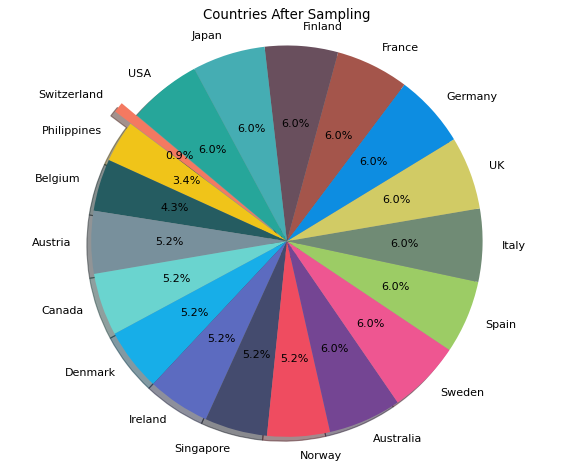

In [25]:
plot_pie(pie_plot_data.COUNTRY.values, pie_plot_data['count'].values, 'Countries After Sampling')

In [26]:
data_sample[data_sample['COUNTRY'] == 'USA'][colslist]

,COUNTRY,PRODUCTLINE
109,USA,Classic Cars
110,USA,Motorcycles
111,USA,Planes
112,USA,Ships
113,USA,Trains
114,USA,Trucks and Buses
115,USA,Vintage Cars
